## Izris genomskih diagramov

Preden nadaljujemo s filogenetsko analizo, poskusimo prikazati mitohondrijski genom na malce lepši način.

In [1]:
from Bio import SeqIO
from Bio import Entrez
Entrez.email = 'moj.mail@naslovu.si'

In [2]:
handle = Entrez.efetch(db='nucleotide', rettype='gb', id='NC_012920.1')

rec = SeqIO.read(handle, "gb")

In [3]:
from reportlab.lib import colors
from reportlab.lib.units import cm
from Bio.Graphics import GenomeDiagram

In [4]:
gd_diagram = GenomeDiagram.Diagram('Mitohondrijski genom')
gd_track_for_features = gd_diagram.new_track(1, name='geni')
gd_feature_set = gd_track_for_features.new_set()

In [5]:
for feature in rec.features:
    if feature.type != "gene" and feature.type != 'D-loop':
        #Exclude this feature
        continue
    if len(gd_feature_set) % 2 == 0:
        color = colors.blue
    else:
        color = colors.lightblue
    gd_feature_set.add_feature(feature, color=color, label=True, sigil="ARROW", 
                               arrowshaft_height=1.0, arrowhead_length=0.25,
                               label_size=10, label_angle=40,
                              )

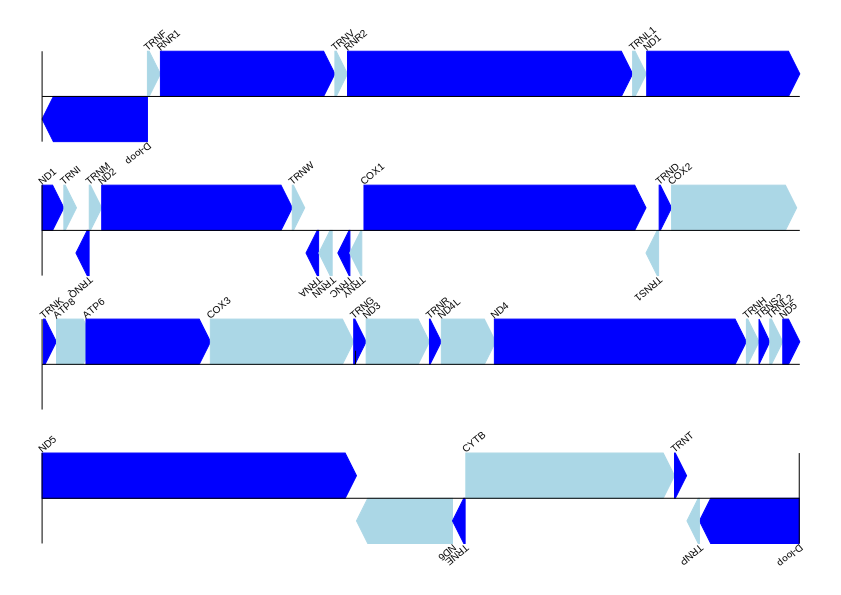

In [6]:
gd_diagram.draw(format="linear", orientation="landscape", pagesize='A4',
                fragments=4, start=0, end=len(rec))
gd_diagram.write("mt_lin.svg", "SVG")
from IPython.display import SVG
SVG("mt_lin.svg")

Morda krožni diagram:

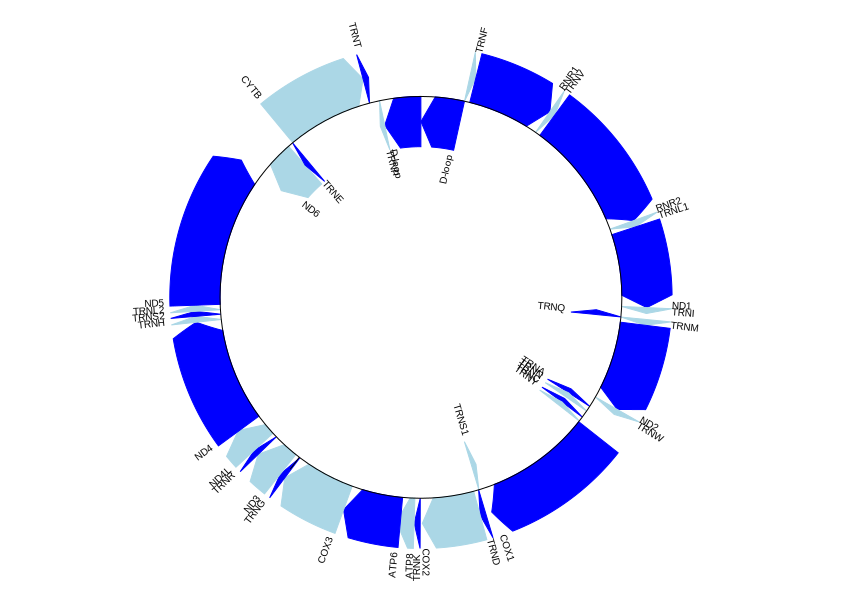

In [7]:
gd_diagram.draw(format="circular", orientation="landscape", pagesize='A4',
                fragments=4, start=0, end=len(rec), circle_core = 0.5)
gd_diagram.write("mt_lin.svg", "SVG")
from IPython.display import SVG
SVG("mt_lin.svg")